<a href="https://colab.research.google.com/github/fouad89/30DaysofML-Kaggle/blob/master/15_02_competition_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# reading data from google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

# preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# modeling
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# evaluation
from sklearn.metrics import mean_absolute_error

In [7]:
COMPETETION_PATH = "/content/drive/MyDrive/30-days-of-ml-competition1"
TRAIN_DATA_PATH = "/content/drive/MyDrive/30-days-of-ml-competition1/data/train.csv"
TEST_DATA_PATH = "/content/drive/MyDrive/30-days-of-ml-competition1/data/test.csv"
OUTPUT_PATH = "/content/drive/MyDrive/30-days-of-ml-competition1/output"

In [4]:
# # Data Paths
# TRAIN_DATA_PATH = os.path.join("data", "train.csv")
# TEST_DATA_PATH = os.path.join("data", "test.csv")

## Understanding Data

In [9]:
full_df = pd.read_csv(TRAIN_DATA_PATH, index_col="id")
full_X_test = pd.read_csv(TEST_DATA_PATH, index_col="id")

In [10]:
# Exploring the data
print(f"Shape of the full dataset {full_df.shape}")
print(f"Shape of the test dataset {full_X_test.shape}")

Shape of the full dataset (300000, 25)
Shape of the test dataset (200000, 24)


In [11]:
full_df.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [12]:
# checking for null values in the full dataset
full_df.isnull().any().sum() # no null value in dataset

0

In [13]:
y = full_df.target.copy()
X = full_df.drop('target', axis=1).copy()

In [14]:
X.shape

(300000, 24)

In [15]:
# splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2,
                                                      random_state= 1)

In [16]:
# categorical columns start with cat
categorical_cols = [cname for cname in X.columns if 'cat' in cname]
# numerical columns starts with cont
numerical_cols = [cname for cname in X.columns if 'cont' in cname]

In [17]:

# checking the cardinality of the categorical columns
for cname in categorical_cols:
    num_unique = X[cname].nunique()
    print(f"{cname} has {num_unique}")
    if num_unique > 10:
        print(f"\t{cname} has a high cardinality")

# eventhough cat9 col has more than 10 unique values, we will still use the OnehotEncoder 

cat0 has 2
cat1 has 2
cat2 has 2
cat3 has 4
cat4 has 4
cat5 has 4
cat6 has 8
cat7 has 8
cat8 has 7
cat9 has 15
	cat9 has a high cardinality


In [18]:
# numerical and categorical transformations
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols),
])


In [19]:
# random forest model & pipeline with default values 
rf_model = RandomForestRegressor(random_state=1)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model),
])

In [20]:
# fitting the first model
rf_pipeline.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# predictions and evaluation
rf_predictions = rf_pipeline.predict(X_valid)
rf_mae = mean_absolute_error(y_valid, rf_predictions)
print(f"MAE is {rf_mae:0.2f}")


MAE is 0.59


In [ ]:

# output
test_prediction = rf_pipeline.predict(full_X_test)
output = pd.DataFrame({"id": full_X_test.index,
    "target": test_prediction})
output.to_csv(os.path.join("output", "submission1.csv"), index=False)

ValueError: ignored

In [ ]:
def get_score(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    my_pipeline = Pipeline(steps=[
                                  ('preprocessor', preprocessor),
                                  ('model', model)
    ])
    my_pipeline.fit(X_t, y_t)
    preds = my_pipeline.predict(X_v)
    return mean_absolute_error(y_v, preds)
    

In [ ]:
xgb_model = XGBRegressor(random_state=1)
get_score(xgb_model)

[13:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.58141917288352

In [ ]:
num_estimators = list(range(100,500, 50))
estimators_mae_dict = {}
for i, n_estimator in enumerate(num_estimators):
    model = XGBRegressor(n_estimators= n_estimator,objective='reg:squarederror', random_state=1)
    print (f"Model {i}\n\t has {n_estimator} estimators \n\tMAE:{get_score(model)}")
    estimators_mae_dict[n_estimator] = get_score(model)

    


Model 0
	 has 100 estimators 
	MAE:0.58141917288352
Model 1
	 has 150 estimators 
	MAE:0.5811053562731076
Model 2
	 has 200 estimators 
	MAE:0.5806215448108675
Model 3
	 has 250 estimators 
	MAE:0.5806959949428289
Model 4
	 has 300 estimators 
	MAE:0.5806348204582048
Model 5
	 has 350 estimators 
	MAE:0.5800087921627418
Model 6
	 has 400 estimators 
	MAE:0.5803418348688879
Model 7
	 has 450 estimators 
	MAE:0.5802753319773681


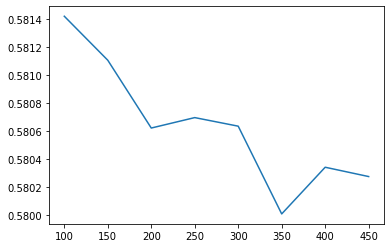

In [ ]:
plt.plot(list(estimators_mae_dict.keys()), list(estimators_mae_dict.values()))

In [ ]:
# it looks like 350 estimators has the lowest mae score 
best_n_estimator = min(estimators_mae_dict, key=estimators_mae_dict.get)
print(f"The best number of estimators is {best_n_estimator}")

The best number of estimators is 350


In [ ]:
# learning rate values 
lr_rates = [0.1, 0.08, 0.05, 0.03, 0.01]
lr_rates_dict = {}
for i, lr_rate in enumerate(lr_rates):
    model = XGBRegressor(n_estimators= best_n_estimator,
                         objective='reg:squarederror', learning_rate = lr_rate,
                         random_state=1)
    print (f"Model {i}\n\t has {lr_rate} Learning Rate \n\tMAE:{get_score(model)}")
    lr_rates_dict[lr_rate] = get_score(model)
    

Model 0
	 has 0.1 Learning Rate 
	MAE:0.5800087921627418
Model 1
	 has 0.08 Learning Rate 
	MAE:0.5805533114859335
Model 2
	 has 0.05 Learning Rate 
	MAE:0.5798324656438496
Model 3
	 has 0.03 Learning Rate 
	MAE:0.580798900598873
Model 4
	 has 0.01 Learning Rate 
	MAE:0.612528628137427


In [ ]:
best_lr_rate = min(lr_rates_dict, key=lr_rates_dict.get)
print(f"Best Learning Rate {best_lr_rate}")

Best Learning Rate 0.05


In [ ]:
num_estimators = list(range(100,500, 50))
estimators_mae_dict = {}
for i, n_estimator in enumerate(num_estimators):
    model = XGBRegressor(n_estimators= n_estimator,
                         objective='reg:squarederror', learning_rate = 0.05,
                         random_state=1)
    print (f"Model {i}\n\t has {n_estimator} estimators \n\tMAE:{get_score(model)}")
    estimators_mae_dict[n_estimator] = get_score(model)

Model 0
	 has 100 estimators 
	MAE:0.5856726472048999
Model 1
	 has 150 estimators 
	MAE:0.5825203573915799
Model 2
	 has 200 estimators 
	MAE:0.5810324053186156
Model 3
	 has 250 estimators 
	MAE:0.5802848674871495
Model 4
	 has 300 estimators 
	MAE:0.5800282489611289
Model 5
	 has 350 estimators 
	MAE:0.5798324656438496
Model 6
	 has 400 estimators 
	MAE:0.5800103318797102
Model 7
	 has 450 estimators 
	MAE:0.579998331962443


In [ ]:
num_estimators = list(range(500,1001, 50))
estimators_mae_dict = {}
for i, n_estimator in enumerate(num_estimators):
    model = XGBRegressor(n_estimators= n_estimator,
                         objective='reg:squarederror', learning_rate = 0.05,
                         random_state=1)
    print (f"Model {i}\n\t has {n_estimator} estimators \n\tMAE:{get_score(model)}")
    estimators_mae_dict[n_estimator] = get_score(model)

Model 0
	 has 500 estimators 
	MAE:0.5803227970497672
Model 1
	 has 550 estimators 
	MAE:0.5803641534130748
Model 2
	 has 600 estimators 
	MAE:0.5803491891016747
Model 3
	 has 650 estimators 
	MAE:0.5804934998177074
Model 4
	 has 700 estimators 
	MAE:0.5807164251859402
Model 5
	 has 750 estimators 
	MAE:0.5804950619618695
Model 6
	 has 800 estimators 
	MAE:0.5807226445517611
Model 7
	 has 850 estimators 
	MAE:0.5809480093794417
Model 8
	 has 900 estimators 
	MAE:0.5810761857182183
Model 9
	 has 950 estimators 
	MAE:0.581275044677726
Model 10
	 has 1000 estimators 
	MAE:0.5814070615181446


In [ ]:
num_estimators = list(range(150, 1001, 50))
lr_rates = [0.05 / i for i in range(1,10)]
model_results = {}
counter = 1
for n_estimator in num_estimators:
    for lr_rate in lr_rates:
        model = XGBRegressor(n_estimators= n_estimator,
                         objective='reg:squarederror', learning_rate = lr_rate,
                         random_state=1)
        model_results[f'model{counter}'] = {'estimators': n_estimator,
                                            'lr': lr_rate,
                                            'mae': get_score(model)}
        print(f"model {counter} is evaluated")
        counter+=1
        
        


model 1 is evaluated
model 2 is evaluated
model 3 is evaluated
model 4 is evaluated
model 5 is evaluated
model 6 is evaluated
model 7 is evaluated
model 8 is evaluated
model 9 is evaluated
model 10 is evaluated
model 11 is evaluated
model 12 is evaluated
model 13 is evaluated
model 14 is evaluated
model 15 is evaluated
model 16 is evaluated
model 17 is evaluated
model 18 is evaluated
model 19 is evaluated
model 20 is evaluated
model 21 is evaluated
model 22 is evaluated
model 23 is evaluated
model 24 is evaluated
model 25 is evaluated
model 26 is evaluated
model 27 is evaluated
model 28 is evaluated
model 29 is evaluated
model 30 is evaluated
model 31 is evaluated
model 32 is evaluated
model 33 is evaluated
model 34 is evaluated
model 35 is evaluated
model 36 is evaluated
model 37 is evaluated
model 38 is evaluated
model 39 is evaluated
model 40 is evaluated
model 41 is evaluated
model 42 is evaluated
model 43 is evaluated
model 44 is evaluated
model 45 is evaluated
model 46 is evaluat

In [ ]:
results_df

,id,model,n_estimators,lr,mae


In [ ]:
results_df = pd.DataFrame(columns=["id","model","n_estimators", "lr", "mae"])
counter = 1
for model in model_results.keys():
    row = [counter,model, model_results[model]['estimators'], 
           model_results[model]['lr'], model_results[model]['mae']]
    results_df.loc[len(results_df)] =row 
    counter+=1


In [ ]:
best_params = {"id", "model", "n_estimators", "lr", "mae"}
results_df[results_df.mae == results_df.mae.min()]

,id,model,n_estimators,lr,mae
36,37,model37,350,0.05,0.579832


In [ ]:
results_df.to_csv(os.path.join("output", "XGB_mae_restuls.csv"), index=False)

{}

In [ ]:
results_df[results_df.mae == results_df.mae.min()].to_csv(os.path.join("output", "best_params.csv"), index=False)

In [ ]:
best_params = results_df[results_df.mae == results_df.mae.min()].to_dict()

{'id': {36: 37},
 'lr': {36: 0.05},
 'mae': {36: 0.5798324656438496},
 'model': {36: 'model37'},
 'n_estimators': {36: 350}}

In [25]:
best_XGB = XGBRegressor(learning_rate = 0.05, n_estimators=350, random_state=1)
xgb_pipeline = Pipeline(steps=[
                              ('preprocessor', preprocessor),
                              ('model', best_XGB)
                              ])

In [26]:
xgb_pipeline.fit(X_train, y_train)

[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                      

In [27]:
predictions2 =  xgb_pipeline.predict(X_valid)
xgb_mae = mean_absolute_error(y_valid, predictions2)
print(f"MAE: {xgb_mae} ")

MAE: 0.5754213992162027 


In [30]:
xgb_test_preds = xgb_pipeline.predict(full_X_test)

In [51]:
output2 = pd.DataFrame({"id":full_X_test.index,
          "target": xgb_test_preds})
output2.set_index("id")

,target
id,
0,8.046600
5,8.288670
15,8.361273
16,8.340855
17,8.204716
...,...
499987,8.166846
499990,8.310244
499991,8.404526


In [52]:
output2.to_csv(os.path.join(OUTPUT_PATH,"submission2.csv"), index=False)

In [53]:
pd.read_csv(os.path.join(OUTPUT_PATH,"submission2.csv"))

,id,target
0,0,8.046600
1,5,8.288670
2,15,8.361273
3,16,8.340855
4,17,8.204716
...,...,...
199995,499987,8.166846
199996,499990,8.310244
199997,499991,8.404526
199998,499994,8.094573


In [49]:
output2.index_col ="id"

In [50]:

output2

,id,target
0,0,8.046600
1,5,8.288670
2,15,8.361273
3,16,8.340855
4,17,8.204716
...,...,...
199995,499987,8.166846
199996,499990,8.310244
199997,499991,8.404526
199998,499994,8.094573
